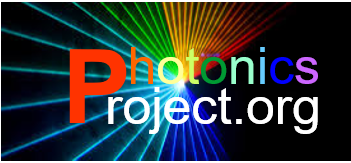

# Function: Atmospheric Transmission

In [1]:
%matplotlib inline
xsize=16
ysize=10
#%matplotlib widget
#xsize=10
#ysize=6
from ipywidgets import interact, interactive, fixed, interact_manual
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import *
#import warnings
#warnings.filterwarnings('ignore')


file1 = open('ModtranDataTransposed.csv', 'r') 
MTD = np.loadtxt('ModtranDataTransposed.csv', delimiter=',')
file1.close

file2 = open('ModtranDesc.csv', 'r') 
#MTdesc = str(np.loadtxt('ModtranDesc.csv', delimiter=','))
#MTdesc = file2.read()   #.replace("\n", " ")
MTdesc = file2.readlines()
file2.close()

lowl = 1.0
upl=15.025
step=0.025
wvl = np.arange(lowl, upl, step)

mtnum = 0
clear = "False"
skip = False
cnt =0
mthist = [0,0,0,0,0,0,0]

#fig = plt.figure(figsize=(7,5))
#ax = fig.add_subplot(1, 1, 1)
#ax.plot(wvl, MTD[mtnum])

def update(Scale,Multiplot,Dist,Humidity,Aerosol,wvl1,wvl2):
    global fig
    global cnt
    global mthist
    
    if wvl1 >= wvl2:
        wvl2=wvl1 + 0.25
        print('WVL1 must be smaller than WVL2!')
        skip = True
    else:
        skip = False
  
#figure out mtnum
    if Dist == "0.5KM":
        if Humidity == "Standard":
            if Aerosol == "Rural":
                mtnum = 2
            elif Aerosol == "Dense":
                mtnum = 3
        elif Humidity == "Tropical":
            if Aerosol == "Rural":
                mtnum = 0
            elif Aerosol == "Dense":
                mtnum = 1
                
    elif Dist == "1KM":
        if Humidity == "Standard":
            if Aerosol == "Rural":
                mtnum = 6
            elif Aerosol == "Dense":
                mtnum = 7
        elif Humidity == "Tropical":
            if Aerosol == "Rural":
                mtnum = 4
            elif Aerosol == "Dense":
                mtnum = 5           
     
    elif Dist == "5KM":
        if Humidity == "Standard":
            if Aerosol == "Rural":
                mtnum = 14
            elif Aerosol == "Dense":
                mtnum = 15
        elif Humidity == "Tropical":
            if Aerosol == "Rural":
                mtnum = 12
            elif Aerosol == "Dense":
                mtnum = 13      
    
    elif Dist == "10KM":
        if Humidity == "Standard":
            if Aerosol == "Rural":
                mtnum = 10
            elif Aerosol == "Dense":
                mtnum = 11
        elif Humidity == "Tropical":
            if Aerosol == "Rural":
                mtnum = 8
            elif Aerosol == "Dense":
                mtnum = 9      
    
    elif Dist == "50KM":
        if Humidity == "Standard":
            if Aerosol == "Rural":
                mtnum = 18
            elif Aerosol == "Dense":
                mtnum = 19
        elif Humidity == "Tropical":
            if Aerosol == "Rural":
                mtnum = 16
            elif Aerosol == "Dense":
                mtnum = 17      

    if Multiplot == "False" :
        #single plot
        fig = plt.figure(figsize=(xsize,ysize))
        ax = fig.add_subplot(1, 1, 1)
        if skip == False:
            ax.plot(wvl, MTD[mtnum],color='red')
        if Scale == "Semi-log":
            plt.yscale('log')
            plt.axis([1.0, 15.0,10E-6,1.0])
        else:
            plt.axis([1.0, 15.0,0,1.0])
            major_yticks = np.arange(0, 1, 0.1)
            ax.set_yticks(major_yticks)
                
        # Major ticks every 20, minor ticks every 5
        major_xticks = np.arange(1, 15, 1)
        minor_xticks = np.arange(1, 15, .25)
        ax.set_xticks(major_xticks)
        ax.set_xticks(minor_xticks, minor=True)
        
               
        # And a corresponding grid
        ax.grid(which='minor', alpha=0.25)
        ax.grid(which='major', alpha=0.75)
        
        title = "Atmosphere: " + MTdesc[mtnum]
        plt.title(title)  
        plt.xlabel('Wavelength')
        plt.ylabel('Transmission')
        
        #sub band avg transmission calculation
        #make a vertical line
        vlinex = np.repeat(1, 5)
        vliney = vlinex * 3
        count=0
        for i in vlinex:
            vliney[count] = (count/3)*2
            count +=1
        vlinex1 = np.repeat(wvl1,5)
        vlinex2 = np.repeat(wvl2,5)
        plt.plot (vlinex1,vliney,':',color='grey', linewidth = 4)
        plt.plot (vlinex2,vliney,':',color='grey', linewidth = 4)
        #calculate sub band average
        avetran = 0
        tcnt = 0
        k = 0
        while k < len(wvl):
            if (wvl[k] > wvl1) and (wvl[k] <wvl2):
                avetran = avetran + MTD[mtnum,k]
                tcnt+=1
            k+=1    
        
        if skip == False :
            avetran = avetran/tcnt
            plt.suptitle('Sub Band Average Transmission: ' + str(round(avetran,4)) + "        Atmosphere Num (0 to 19):  " + str(mtnum))
            plt.fill_between(wvl, 0, MTD[mtnum], where = (wvl>wvl1), facecolor='orange',alpha=0.4)
            plt.fill_between(wvl, 0, MTD[mtnum], where = (wvl>wvl2), facecolor='white')
                
        #reset mt history and counts - no overplots
        mthist = [0,0,0,0,0,0,0]
        cnt = 0
        
    else :
        #multiple over plots
        #plt.style.use('dark_background')
        fig = plt.figure(figsize=(xsize,ysize))
        ax = fig.add_subplot(1, 1, 1)
        ax.plot(wvl, MTD[mtnum],linewidth=1.5,color='red')
        ax.plot(wvl, MTD[mtnum],linewidth=2.0,color='red',linestyle = ':')
        #print ("EQ")
        i=0
        while i < cnt:
            #print (i)
            ax.plot(wvl, MTD[mthist[i]],alpha=0.75)
            i+=1
        if Scale == "Semi-log":
            plt.yscale('log')
            plt.axis([1.0, 15.0,10E-6,1.0])
        else:
            plt.axis([1.0, 15.0,0,1.0])
        plt.grid(True)
        title = "Modtran: " + MTdesc[mtnum] 
        plt.title(title)  
        plt.xlabel('Wavelength')
        plt.ylabel('Transmission')
        
        mthist[cnt]=mtnum
        cnt +=1
        if cnt > 6:
            cnt = 0
            mthist = [0,0,0,0,0,0,0]

# Description width style
style = {'description_width': 'initial'}              
            
interact(update,
         Scale=["Linear","Semi-log"],
         Multiplot=["False","True"],
         Dist=["0.5KM","1KM","5KM","10KM","50KM"],
         Humidity=["Standard","Tropical"],
         Aerosol=["Rural","Dense"],
         #mtnum=widgets.IntSlider(6,1,19,1,description = "Modtran ATM",layout=Layout(width="380px")),
         wvl1 = widgets.FloatSlider(value= 8.5, min=1, max=15, step=0.25,description='    WVL1 ('+ chr(955) + ' um)', style=style, continuous_update=False,layout=Layout(width='850px')),
         wvl2 = widgets.FloatSlider(value=11.5, min=1, max=15, step=0.25,description='    WVL2 ('+ chr(955) + ' um)', style=style, continuous_update=False,layout=Layout(width='850px'))
         );    


interactive(children=(IntSlider(value=6, description='mtnum', max=19, min=1), Dropdown(description='colr', opt…